# Kelompok ThreeMasKentir
Nama anggota:
- Bayu Satrio Wibowo
- Fathan Fardian Sanum
- Syahdan Rizqi Ruhendy

Sumber dataset yang diambil https://www.kaggle.com/datasets/parthpatel2130/realistic-loan-approval-dataset-us-and-canada

## Import Library & Tools.
Disini kita akan mengimport semua library & tools yang akan kita gunakan untuk mengolah dan memprediksi `status_pinjaman`

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parthpatel2130/realistic-loan-approval-dataset-us-and-canada")

print("Path to dataset files:", path)

100%|██████████| 1.64M/1.64M [00:00<00:00, 53.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/parthpatel2130/realistic-loan-approval-dataset-us-and-canada/versions/1


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# algoritma machine learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
df = pd.read_csv(os.path.join(path, 'Loan_approval_data_2025.csv'))

df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


Menghapus `customer_id` karena kolom tersebut tidak memberikan informasi.

---



In [ ]:
df.drop(columns=['customer_id'], inplace=True)

df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_'))

df.columns.tolist()


['age',
 'occupation_status',
 'years_employed',
 'annual_income',
 'credit_score',
 'credit_history_years',
 'savings_assets',
 'current_debt',
 'defaults_on_file',
 'delinquencies_last_2yrs',
 'derogatory_marks',
 'product_type',
 'loan_intent',
 'loan_amount',
 'interest_rate',
 'debt_to_income_ratio',
 'loan_to_income_ratio',
 'payment_to_income_ratio',
 'loan_status']

Cek data duplikat dan missing values

In [ ]:
print(f'Duplicate data: {df.duplicated().sum()}')
print(f'Missing values (total sel kosong): {df.isna().sum().sum()}')

missing_rate = df.isna().mean().sort_values(ascending=False)
missing_rate


Duplicate data: 0
Missing values (total sel kosong): 0


,0
age,0.0
occupation_status,0.0
years_employed,0.0
annual_income,0.0
credit_score,0.0
credit_history_years,0.0
savings_assets,0.0
current_debt,0.0
defaults_on_file,0.0
delinquencies_last_2yrs,0.0


Disini terlihat ada **0** missing value, berarti tidak ada missing value pada data tersebut.

In [ ]:
df.isna().mean()

,0
age,0.0
occupation_status,0.0
years_employed,0.0
annual_income,0.0
credit_score,0.0
credit_history_years,0.0
savings_assets,0.0
current_debt,0.0
defaults_on_file,0.0
delinquencies_last_2yrs,0.0


Berdasarkan hasil pengecekan kualitas data menggunakan isna().sum() / isnull().sum(), dataset tidak memiliki missing value (missing = 0) pada seluruh kolom. Oleh karena itu, tidak diperlukan proses imputasi maupun penghapusan baris terkait missing value, dan data dapat langsung dilanjutkan ke tahap preprocessing berikutnya (encoding/normalisasi) untuk pelatihan model.

Selain itu, dilakukan pengecekan nilai kosong berupa string (mis. "" atau " "), dan tidak ditemukan nilai kosong yang memengaruhi proses analisis.

In [ ]:
print(f"Duplicate data: {df.duplicated().sum()}")
print(f"Missing values (total sel kosong): {df.isna().sum().sum()}")

missing_rate = df.isna().mean().sort_values(ascending=False)
missing_rate


Duplicate data: 0
Missing values (total sel kosong): 0


,0
age,0.0
occupation_status,0.0
years_employed,0.0
annual_income,0.0
credit_score,0.0
credit_history_years,0.0
savings_assets,0.0
current_debt,0.0
defaults_on_file,0.0
delinquencies_last_2yrs,0.0


## Eksplorasi Data
Disini kita akan mengeksplor data yang diambil.

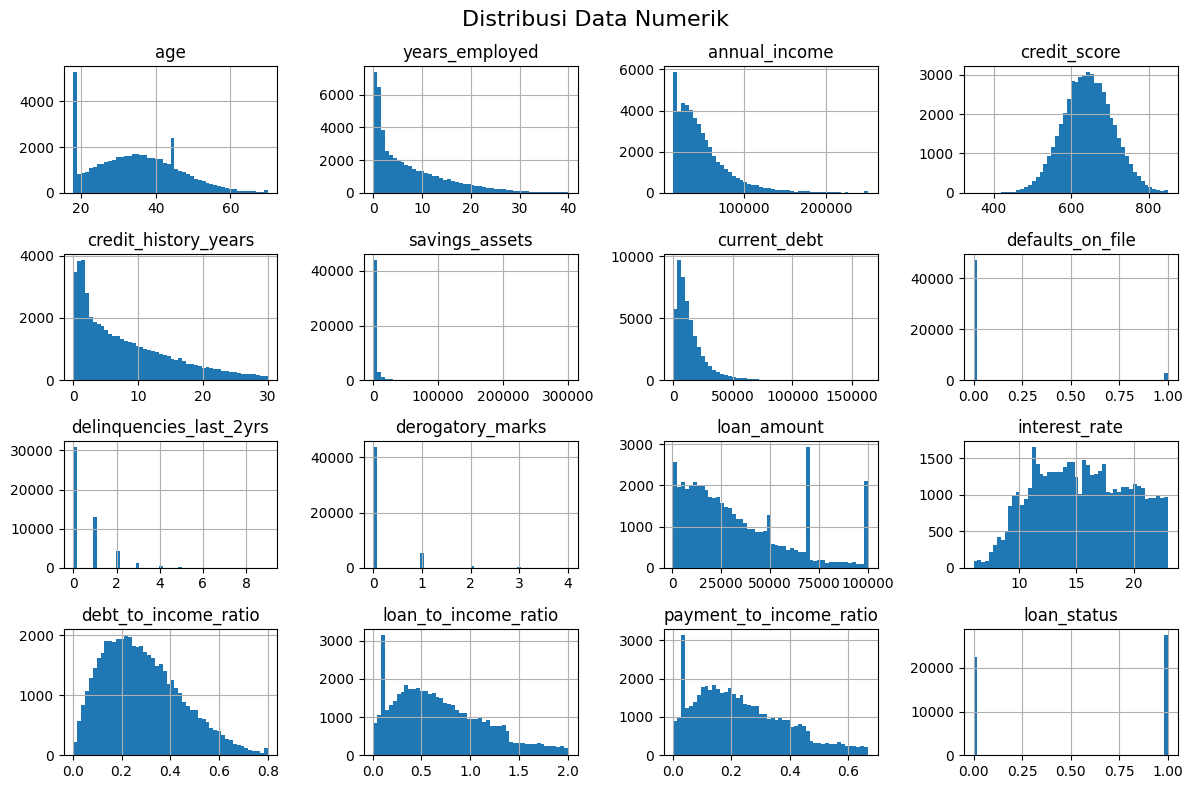

In [ ]:
axes = df.hist(bins=50, figsize=(12, 8))
if axes.size > 0:
    fig = axes.flatten()[0].figure
    fig.suptitle('Distribusi Data Numerik', fontsize=16)
    fig.tight_layout()
plt.show()

Dari distribusi data numerik, bisa dilihat beberapa kolom cenderung skewed atau miring, ini akan memengaruhi penggunaan model yang algoritmanya berbasis **distance-learning** dan **linear-based learning**.

Maka dari itu, kita nanti akan men-transformasi data skewed menjadi distribusi normal

In [ ]:
df["loan_status"].value_counts()

,count
loan_status,
1,27523
0,22477


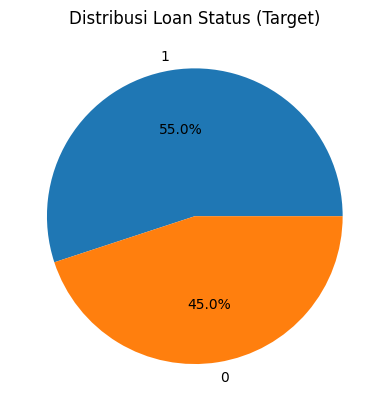

In [ ]:
target_counts = df["loan_status"].value_counts()

plt.pie(target_counts, labels=target_counts.index, autopct="%1.1f%%")
plt.title("Distribusi Loan Status (Target)")
plt.show()


Dari variabel targetnya, sudah terlihat balanced. Jadi tidak perlu menghandle kasus imbalanced data

In [ ]:
df.head()

,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


In [ ]:
categorical_cols = ['occupation_status', 'product_type', 'loan_intent']

# melakukan label encoding di setiap kolom kategorikal
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

df.head()

,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,0,17.2,25579,692,5.3,895,10820,0,0,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,0,7.3,43087,627,3.5,169,16550,0,1,0,2,3,53300,14.10,0.384,1.237,0.412,0
2,42,2,1.1,20840,689,8.4,17,7852,0,0,0,0,1,2100,18.33,0.377,0.101,0.034,1
3,53,2,0.5,29147,692,9.8,1480,11603,0,1,0,0,0,2900,18.74,0.398,0.099,0.033,1
4,32,0,12.5,63657,630,7.2,209,12424,0,0,0,2,2,99600,13.92,0.195,1.565,0.522,1


### Transformasi Variabel Skewed / Miring
Kita akan melakukan transformasi variabel miring agar menjadi distribusi normal / gaussian.

- annual_income
- savings_assets (sangat skewed, wajib di-transform)
- years_employed
- current_debt
- loan_amount

In [ ]:
# konversi skewed ke distribusi normal menggunakan log-transformation
df['annual_income'] = np.log1p(df['annual_income'])
df['savings_assets'] = np.log1p(df['savings_assets'])
df['years_employed'] = np.log1p(df['years_employed'])
df['current_debt'] = np.log1p(df['current_debt'])
df['loan_amount'] = np.log1p(df['loan_amount'])
df['credit_history_years'] = np.log1p(df['credit_history_years'])
df['debt_to_income_ratio'] = np.log1p(df['debt_to_income_ratio'])
df['loan_to_income_ratio'] = np.log1p(df['loan_to_income_ratio'])
df['payment_to_income_ratio'] = np.log1p(df['payment_to_income_ratio'])


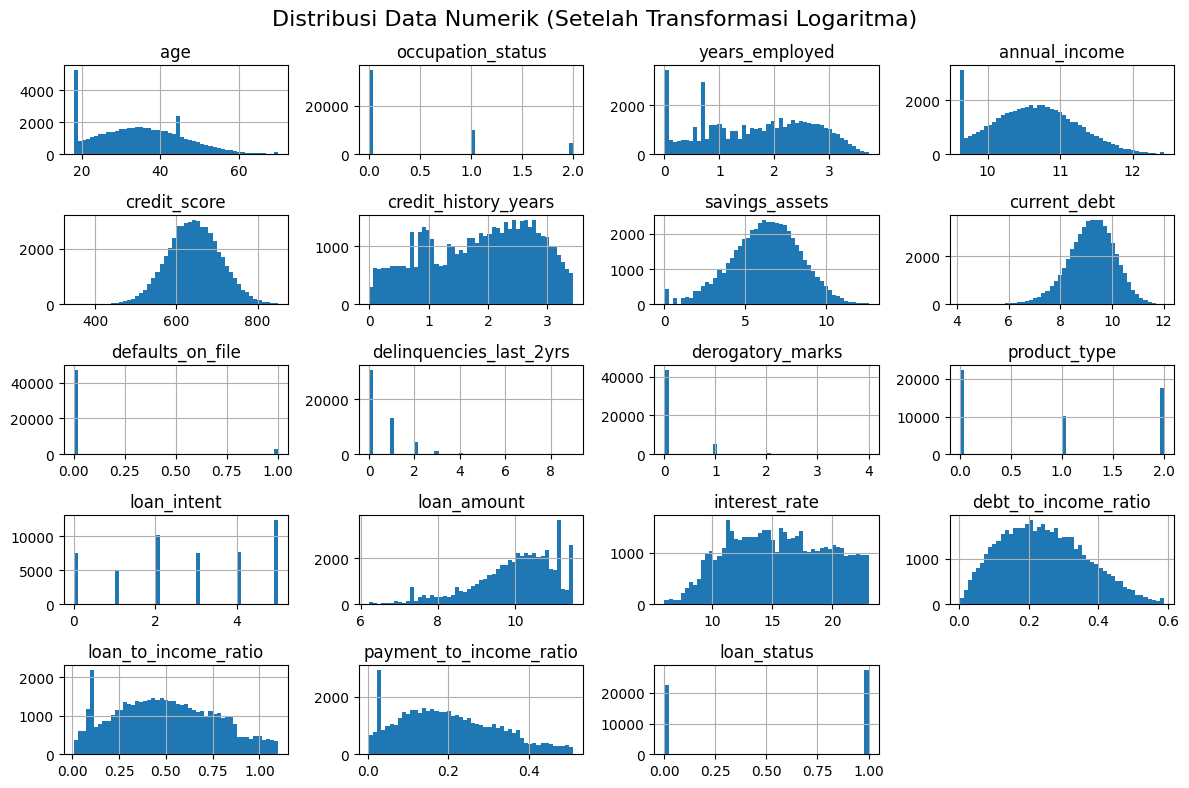

In [ ]:
axes = df.hist(bins=50, figsize=(12, 8));
if axes.size > 0:
    fig = axes.flatten()[0].figure
    fig.suptitle('Distribusi Data Numerik (Setelah Transformasi Logaritma)', fontsize=16);
    fig.tight_layout()

Setelah dilakukan transformasi feature data yang miring / skewed, data sudah terlihat mendekati distribusi normal. Hal ini diperlukan untuk memenuhi syarat algoritma model **distance-based learning** & **linear-based learning** terpenuhi agar hasilnya optimal.

## Pembagian Dataset (Train, Val, Test)
Disini kita akan menggunakan split train:val:test dengan proporsi 70:20:10.

In [ ]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# split pertama : 70% train, 30% for val+test
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y  # stratify untuk maintain balance
)

# split kedua: 20% val, 10% test from the 30% temp set
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=1/3,  # 1/3 of 30% is 10% of total
    random_state=42,
    stratify=y_temp  # stratify untuk maintain balance
)


## Pemodelan
Model yang akan diuji adalah:
- Linear Regression
- Logistik Regression
- Decision Tree
- K-Nearest Neighbour
- Naive Bayes
- Algoritma Genetika

In [ ]:

def display_confusion_matrix(y_true, y_pred, nama_model="Model"):
    plt.figure(figsize=(6, 5))

    ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=['Rejected (0)', 'Approved (1)'],
        cmap='Blues',
        values_format='d',
        colorbar=False
    )

    plt.title(f"Confusion Matrix: {nama_model}")
    plt.grid(False)
    plt.show()


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# Linear Regression

1) Tuning Threshold pada Linear Regression

Linear Regression menghasilkan output berupa nilai kontinu. Karena target yang digunakan adalah klasifikasi biner (0/1), nilai kontinu tersebut perlu diubah menjadi label kelas menggunakan threshold.
Pada baseline sebelumnya, threshold ditetapkan 0.5. Namun threshold 0.5 tidak selalu memberikan performa terbaik, karena distribusi skor prediksi tiap dataset bisa berbeda.
Pada tahap tuning ini, dilakukan pencarian threshold terbaik pada data validation untuk memperoleh metrik yang lebih tinggi (misalnya akurasi, atau bisa juga F1/recall sesuai kebutuhan).

In [ ]:
linreg_model = LinearRegression()
linreg_model.fit(X_train_scaled, y_train)

y_pred_lin = (linreg_model.predict(X_val_scaled) >= 0.5).astype(int)

print("-" * 40)
print("HASIL EVALUASI LINEAR REGRESSION (THRESHOLD 0.5)")
print("-" * 40)
print(f'Akurasi LinReg   : {accuracy_score(y_val, y_pred_lin):.4f}')
print(f'Precision LinReg : {precision_score(y_val, y_pred_lin):.4f}')
print(f'Recall LinReg    : {recall_score(y_val, y_pred_lin):.4f}')
print("-" * 40)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_lin))

----------------------------------------
HASIL EVALUASI LINEAR REGRESSION (THRESHOLD 0.5)
----------------------------------------
Akurasi LinReg   : 0.8571
Precision LinReg : 0.8496
Recall LinReg    : 0.8997
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      4495
           1       0.85      0.90      0.87      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.86      0.86     10000



2) Hyperparameter Tuning dengan Logistic Regression (GridSearch)

Linear Regression pada dasarnya dirancang untuk regresi, bukan klasifikasi. Untuk klasifikasi biner, model yang lebih tepat adalah Logistic Regression, karena model ini secara langsung memodelkan probabilitas kelas (0–1).
Pada tahap ini dilakukan hyperparameter tuning menggunakan GridSearchCV, terutama pada parameter C (kekuatan regularisasi). Tujuannya adalah mencari kombinasi parameter yang menghasilkan performa validasi terbaik dan mengurangi risiko model underfitting/overfitting.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# 1) Train model
linreg_model = LinearRegression()
linreg_model.fit(X_train_scaled, y_train)

# 2) Predict score (kontinu)
y_score_lin = linreg_model.predict(X_val_scaled)

# 3) Cari threshold terbaik utk akurasi
thresholds = np.linspace(y_score_lin.min(), y_score_lin.max(), 500)

best_t = None
best_acc = -1
for t in thresholds:
    y_pred_tmp = (y_score_lin >= t).astype(int)
    acc_tmp = accuracy_score(y_val, y_pred_tmp)
    if acc_tmp > best_acc:
        best_acc = acc_tmp
        best_t = t

# 4) Prediksi final pakai threshold terbaik
y_pred_lin = (y_score_lin >= best_t).astype(int)

print("-" * 50)
print("HASIL EVALUASI LINEAR REGRESSION (BEST THRESHOLD)")
print("-" * 50)
print(f"Best Threshold   : {best_t:.6f}")
print(f"Akurasi LinReg   : {accuracy_score(y_val, y_pred_lin):.4f}")
print(f"Precision LinReg : {precision_score(y_val, y_pred_lin):.4f}")
print(f"Recall LinReg    : {recall_score(y_val, y_pred_lin):.4f}")
print("-" * 50)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_lin))


--------------------------------------------------
HASIL EVALUASI LINEAR REGRESSION (BEST THRESHOLD)
--------------------------------------------------
Best Threshold   : 0.512471
Akurasi LinReg   : 0.8589
Precision LinReg : 0.8589
Recall LinReg    : 0.8899
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4495
           1       0.86      0.89      0.87      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



3) Tuning Threshold pada Logistic Regression

Meskipun Logistic Regression memiliki default threshold 0.5, nilai threshold ini tetap dapat dioptimalkan.
Penyesuaian threshold berguna karena:

meningkatkan akurasi jika distribusi probabilitas tidak simetris,

meningkatkan recall (lebih banyak mendeteksi kelas 1) dengan menurunkan threshold,

meningkatkan precision (lebih selektif terhadap kelas 1) dengan menaikkan threshold.

Pada tahap ini dilakukan pencarian threshold terbaik pada output probabilitas (predict_proba) menggunakan data validation, sehingga keputusan klasifikasi lebih optimal.

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# 1) GridSearch model
logreg = LogisticRegression(max_iter=5000)

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

grid = GridSearchCV(logreg, param_grid, cv=5, scoring="accuracy")
grid.fit(X_train_scaled, y_train)

best_logreg = grid.best_estimator_

# 2) Prediksi (default threshold 0.5)
y_prob = best_logreg.predict_proba(X_val_scaled)[:, 1]
y_pred_logreg = (y_prob >= 0.5).astype(int)

print("-" * 50)
print("HASIL EVALUASI LOGISTIC REGRESSION (GRIDSEARCH, THRESHOLD 0.5)")
print("-" * 50)
print(f"Best Params      : {grid.best_params_}")
print(f"Akurasi LogReg   : {accuracy_score(y_val, y_pred_logreg):.4f}")
print(f"Precision LogReg : {precision_score(y_val, y_pred_logreg):.4f}")
print(f"Recall LogReg    : {recall_score(y_val, y_pred_logreg):.4f}")
print("-" * 50)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_logreg))


--------------------------------------------------
HASIL EVALUASI LOGISTIC REGRESSION (GRIDSEARCH, THRESHOLD 0.5)
--------------------------------------------------
Best Params      : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Akurasi LogReg   : 0.8625
Precision LogReg : 0.8686
Recall LogReg    : 0.8839
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4495
           1       0.87      0.88      0.88      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



4) Regularisasi dengan Ridge Regression + Tuning Alpha + Threshold

Jika pendekatan yang digunakan tetap berbasis model linear, maka peningkatan dapat dilakukan dengan menambahkan regularisasi. Ridge Regression adalah Linear Regression dengan regularisasi L2 yang membantu menstabilkan koefisien dan meningkatkan generalisasi, terutama ketika fitur saling berkorelasi atau jumlah fitur cukup banyak.
Pada tahap ini dilakukan:

Hyperparameter tuning untuk mencari nilai alpha terbaik (kekuatan regularisasi),

Tuning threshold untuk mengubah output kontinu Ridge menjadi label 0/1 secara optimal pada validation set.

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# 1) GridSearch Ridge (tuning alpha)
ridge = Ridge()

param_grid = {"alpha": np.logspace(-4, 4, 30)}
grid = GridSearchCV(ridge, param_grid, cv=5, scoring="neg_mean_squared_error")
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_

# 2) Predict score
y_score_ridge = best_ridge.predict(X_val_scaled)

# 3) Cari threshold terbaik utk akurasi
thresholds = np.linspace(y_score_ridge.min(), y_score_ridge.max(), 500)

best_t = None
best_acc = -1
for t in thresholds:
    y_pred_tmp = (y_score_ridge >= t).astype(int)
    acc_tmp = accuracy_score(y_val, y_pred_tmp)
    if acc_tmp > best_acc:
        best_acc = acc_tmp
        best_t = t

# 4) Prediksi final
y_pred_ridge = (y_score_ridge >= best_t).astype(int)

print("-" * 50)
print("HASIL EVALUASI RIDGE REGRESSION (BEST ALPHA + BEST THRESHOLD)")
print("-" * 50)
print(f"Best Alpha       : {grid.best_params_['alpha']}")
print(f"Best Threshold   : {best_t:.6f}")
print(f"Akurasi Ridge    : {accuracy_score(y_val, y_pred_ridge):.4f}")
print(f"Precision Ridge  : {precision_score(y_val, y_pred_ridge):.4f}")
print(f"Recall Ridge     : {recall_score(y_val, y_pred_ridge):.4f}")
print("-" * 50)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_ridge))


--------------------------------------------------
HASIL EVALUASI RIDGE REGRESSION (BEST ALPHA + BEST THRESHOLD)
--------------------------------------------------
Best Alpha       : 0.1082636733874054
Best Threshold   : 0.513768
Akurasi Ridge    : 0.8588
Precision Ridge  : 0.8596
Recall Ridge     : 0.8886
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4495
           1       0.86      0.89      0.87      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



<Figure size 600x500 with 0 Axes>

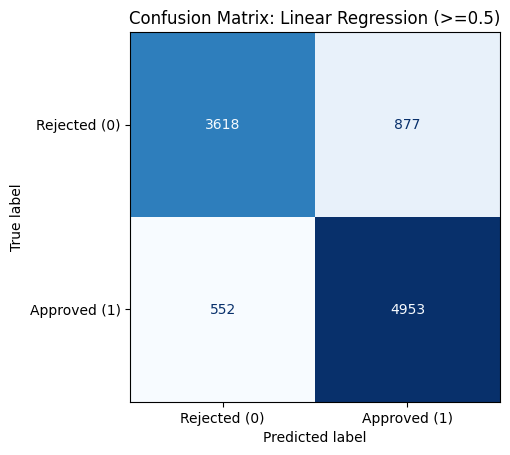

In [ ]:
display_confusion_matrix(y_val, y_pred_lin, "Linear Regression (>=0.5)")

# Logistik Regression

Hyperparameter Tuning Logistic Regression dengan GridSearchCV

Tahap tuning ini menggunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik pada Logistic Regression berdasarkan performa cross-validation (cv=5).
Logistic Regression cocok untuk klasifikasi biner karena memodelkan probabilitas kelas (0–1), dan performanya sangat dipengaruhi oleh regularisasi serta metode optimisasi.

Yang dituning pada kode ini:

C: mengatur kekuatan regularisasi (kebalikan dari alpha).
Nilai C kecil → regularisasi lebih kuat (lebih “nahan” koefisien, bisa mengurangi overfitting).
Nilai C besar → regularisasi lebih lemah (model lebih fleksibel, tapi bisa lebih rawan overfitting).

solver: algoritma optimisasi untuk mencari parameter model.
lbfgs biasanya bagus untuk dataset ukuran sedang-besar, sedangkan liblinear sering stabil untuk dataset kecil dan mendukung beberapa konfigurasi penalty tertentu.

penalty='l2': jenis regularisasi yang digunakan (L2/Ridge-style), umum dan stabil untuk Logistic Regression.

Setelah GridSearch selesai:

best_params_ berisi kombinasi parameter terbaik (berdasarkan accuracy rata-rata CV).

best_estimator_ adalah model Logistic Regression yang sudah memakai parameter terbaik tersebut.

Model terbaik lalu dievaluasi pada validation set menggunakan metrik akurasi, precision, recall, dan classification report.

In [ ]:
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

grid_search_logreg = GridSearchCV(
    estimator=LogisticRegression(max_iter=2000),
    param_grid=param_grid_logreg,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_logreg.fit(X_train_scaled, y_train)

best_params_logreg = grid_search_logreg.best_params_
best_logreg_model = grid_search_logreg.best_estimator_

y_pred_logreg = best_logreg_model.predict(X_val_scaled)

print("-" * 40)
print("HASIL EVALUASI LOGISTIC REGRESSION (GRID SEARCH)")
print("-" * 40)
print(f'Akurasi LogReg   : {accuracy_score(y_val, y_pred_logreg):.4f}')
print(f'Precision LogReg : {precision_score(y_val, y_pred_logreg):.4f}')
print(f'Recall LogReg    : {recall_score(y_val, y_pred_logreg):.4f}')
print("-" * 40)

print("\nBest Params LogReg:", best_params_logreg)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_logreg))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------------------------------------
HASIL EVALUASI LOGISTIC REGRESSION (GRID SEARCH)
----------------------------------------
Akurasi LogReg   : 0.8625
Precision LogReg : 0.8686
Recall LogReg    : 0.8839
----------------------------------------

Best Params LogReg: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4495
           1       0.87      0.88      0.88      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



1) Tuning yang lebih lengkap: penalty (l1/l2/elasticnet) + class_weight

Tuning ini memperluas ruang pencarian:

penalty:

l1 bisa “menyeleksi fitur” (banyak koefisien jadi 0)

elasticnet kombinasi l1 + l2 (lebih fleksibel)

class_weight='balanced' membantu jika kelas 0/1 tidak seimbang.

solver='saga' mendukung l1 dan elasticnet.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_logreg2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.2, 0.5, 0.8],          # hanya kepakai untuk elasticnet (aman tetap ditaruh)
    'class_weight': [None, 'balanced']
}

grid_search_logreg2 = GridSearchCV(
    estimator=LogisticRegression(max_iter=5000),
    param_grid=param_grid_logreg2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_logreg2.fit(X_train_scaled, y_train)

best_params_logreg2 = grid_search_logreg2.best_params_
best_logreg_model2 = grid_search_logreg2.best_estimator_

y_pred_logreg2 = best_logreg_model2.predict(X_val_scaled)

print("-" * 40)
print("HASIL EVALUASI LOGISTIC REGRESSION (EXTENDED GRID)")
print("-" * 40)
print(f'Akurasi LogReg   : {accuracy_score(y_val, y_pred_logreg2):.4f}')
print(f'Precision LogReg : {precision_score(y_val, y_pred_logreg2):.4f}')
print(f'Recall LogReg    : {recall_score(y_val, y_pred_logreg2):.4f}')
print("-" * 40)

print("\nBest Params LogReg:", best_params_logreg2)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_logreg2))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------------------------------------
HASIL EVALUASI LOGISTIC REGRESSION (EXTENDED GRID)
----------------------------------------
Akurasi LogReg   : 0.8602
Precision LogReg : 0.8820
Recall LogReg    : 0.8612
----------------------------------------

Best Params LogReg: {'C': 10, 'class_weight': 'balanced', 'l1_ratio': 0.2, 'penalty': 'elasticnet', 'solver': 'saga'}

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      4495
           1       0.88      0.86      0.87      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



2) Tuning pakai RandomizedSearchCV (lebih cepat untuk ruang parameter lebar)

Kalau kombinasi param banyak, GridSearch bisa lama. RandomizedSearch mengambil beberapa kombinasi acak tapi sering cukup efektif.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from scipy.stats import loguniform

param_dist = {
    'C': loguniform(1e-4, 1e2),
    'solver': ['saga'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.2, 0.5, 0.8],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=5000),
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_scaled, y_train)

best_params_rs = random_search.best_params_
best_logreg_rs = random_search.best_estimator_

y_pred_rs = best_logreg_rs.predict(X_val_scaled)

print("-" * 40)
print("HASIL EVALUASI LOGISTIC REGRESSION (RANDOM SEARCH)")
print("-" * 40)
print(f'Akurasi LogReg   : {accuracy_score(y_val, y_pred_rs):.4f}')
print(f'Precision LogReg : {precision_score(y_val, y_pred_rs):.4f}')
print(f'Recall LogReg    : {recall_score(y_val, y_pred_rs):.4f}')
print("-" * 40)

print("\nBest Params LogReg:", best_params_rs)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_rs))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
----------------------------------------
HASIL EVALUASI LOGISTIC REGRESSION (RANDOM SEARCH)
----------------------------------------
Akurasi LogReg   : 0.8624
Precision LogReg : 0.8682
Recall LogReg    : 0.8843
----------------------------------------

Best Params LogReg: {'C': np.float64(1.274671157821506), 'class_weight': None, 'l1_ratio': 0.8, 'penalty': 'l1', 'solver': 'saga'}

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4495
           1       0.87      0.88      0.88      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



3) Tuning dengan scoring yang lebih relevan (misal F1 / Recall) + StratifiedKFold

Kalau data tidak seimbang, accuracy kadang menipu. Tuning ini mengganti target optimasi menjadi F1 (atau recall).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_f1 = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced']
}

grid_search_f1 = GridSearchCV(
    estimator=LogisticRegression(max_iter=2000),
    param_grid=param_grid_f1,
    cv=cv,
    scoring='f1',     # bisa ganti 'recall' atau 'precision'
    n_jobs=-1,
    verbose=1
)

grid_search_f1.fit(X_train_scaled, y_train)

best_params_f1 = grid_search_f1.best_params_
best_model_f1 = grid_search_f1.best_estimator_

y_pred_f1 = best_model_f1.predict(X_val_scaled)

print("-" * 40)
print("HASIL EVALUASI LOGISTIC REGRESSION (GRID SEARCH - SCORING F1)")
print("-" * 40)
print(f'Akurasi LogReg   : {accuracy_score(y_val, y_pred_f1):.4f}')
print(f'Precision LogReg : {precision_score(y_val, y_pred_f1):.4f}')
print(f'Recall LogReg    : {recall_score(y_val, y_pred_f1):.4f}')
print("-" * 40)

print("\nBest Params LogReg:", best_params_f1)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_f1))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------------------------------------
HASIL EVALUASI LOGISTIC REGRESSION (GRID SEARCH - SCORING F1)
----------------------------------------
Akurasi LogReg   : 0.8625
Precision LogReg : 0.8686
Recall LogReg    : 0.8839
----------------------------------------

Best Params LogReg: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4495
           1       0.87      0.88      0.88      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



4) Threshold tuning setelah model terbaik (optimasi akurasi / F1 / recall)

.predict() default threshold 0.5. Ini bisa dituning dari output probabilitas predict_proba().

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

y_prob = best_logreg_model.predict_proba(X_val_scaled)[:, 1]

thresholds = np.linspace(0.0, 1.0, 501)
best_t, best_acc = None, -1

for t in thresholds:
    y_pred_tmp = (y_prob >= t).astype(int)
    acc_tmp = accuracy_score(y_val, y_pred_tmp)
    if acc_tmp > best_acc:
        best_acc, best_t = acc_tmp, t

y_pred_thr = (y_prob >= best_t).astype(int)

print("-" * 40)
print("HASIL EVALUASI LOGISTIC REGRESSION (BEST THRESHOLD - ACCURACY)")
print("-" * 40)
print(f'Best Threshold   : {best_t:.3f}')
print(f'Akurasi LogReg   : {accuracy_score(y_val, y_pred_thr):.4f}')
print(f'Precision LogReg : {precision_score(y_val, y_pred_thr):.4f}')
print(f'Recall LogReg    : {recall_score(y_val, y_pred_thr):.4f}')
print("-" * 40)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_thr))


----------------------------------------
HASIL EVALUASI LOGISTIC REGRESSION (BEST THRESHOLD - ACCURACY)
----------------------------------------
Best Threshold   : 0.506
Akurasi LogReg   : 0.8630
Precision LogReg : 0.8709
Recall LogReg    : 0.8819
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4495
           1       0.87      0.88      0.88      5505

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



<Figure size 600x500 with 0 Axes>

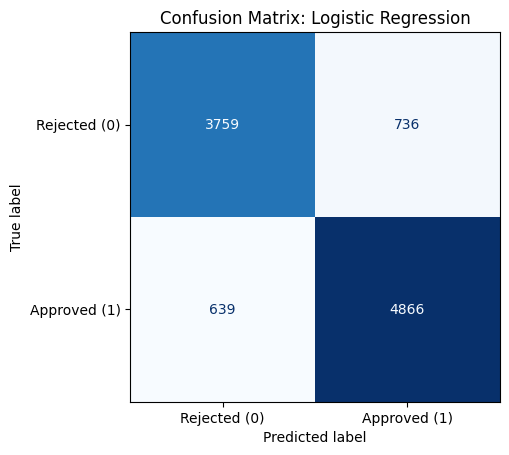

In [ ]:
display_confusion_matrix(y_val, y_pred_logreg, "Logistic Regression")


# Decision Tree

Hyperparameter Tuning Decision Tree dengan GridSearchCV

Decision Tree bekerja dengan cara membuat aturan bercabang (seperti flowchart) dari data. Pada dataset klasifikasi biner (misalnya 0/1), model akan mencari pemisahan fitur yang paling “rapi” untuk memisahkan dua kelas tersebut.
Tuning diperlukan karena tanpa batasan, Decision Tree cenderung terlalu hafal data training (overfitting). Maka beberapa parameter diatur agar pohon tidak terlalu kompleks dan bisa generalisasi lebih baik.

Pada tuning ini, GridSearchCV mencoba beberapa kombinasi parameter berikut:

criterion: cara mengukur “bagus tidaknya” sebuah split.

gini: mengukur tingkat “campur aduk” kelas di node (cepat dan umum).

entropy: mirip gini tapi berbasis konsep information gain (kadang lebih akurat, kadang sama saja).

max_depth: batas kedalaman pohon.

None berarti pohon boleh tumbuh sampai memisahkan data sedetail mungkin (rawan overfitting).

nilai seperti 5, 10, 15, 20 membatasi kompleksitas pohon agar lebih stabil.

min_samples_split: minimal jumlah data di suatu node agar node itu boleh di-split.

makin besar nilainya → pohon lebih “hati-hati” membelah → mengurangi overfitting.

min_samples_leaf: minimal jumlah data yang wajib ada di node daun (node akhir).

makin besar nilainya → daun tidak boleh terlalu “kecil” → model tidak terlalu spesifik terhadap kasus-kasus langka.

Setelah proses GridSearch:

best_params_ berisi kombinasi parameter terbaik berdasarkan accuracy rata-rata cross-validation (cv=5).

best_estimator_ adalah model Decision Tree terbaik yang kemudian diuji pada validation set.

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],          # pengukuran kualitas split
    'max_depth': [None, 5, 10, 15, 20],        # kedalaman pohon (None = sampai habis)
    'min_samples_split': [2, 5, 10],           # minimal sampel untuk membelah node
    'min_samples_leaf': [1, 2, 4]              # minimal sampel di node paling ujung (daun)
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42), # random_state agar hasil konsisten
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy', # bisa diganti 'recall' jika ingin prioritaskan deteksi approved
    n_jobs=-1,
    verbose=1
)

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

y_pred_dt = best_dt_model.predict(X_val)

print("-" * 35)
print("HASIL EVALUASI DECISION TREE")
print("-" * 35)
print(f'Akurasi DT   : {accuracy_score(y_val, y_pred_dt):.4f}')
print(f'Precision DT : {precision_score(y_val, y_pred_dt):.4f}')
print(f'Recall DT    : {recall_score(y_val, y_pred_dt):.4f}')
print("-" * 35)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
-----------------------------------
HASIL EVALUASI DECISION TREE
-----------------------------------
Akurasi DT   : 0.8880
Precision DT : 0.8865
Recall DT    : 0.9135
-----------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4495
           1       0.89      0.91      0.90      5505

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



1) Tambah splitter + class_weight (bagus untuk data imbalanced)

splitter: cara memilih split di tiap node

best = pilih split terbaik (default)

random = pilih split acak (kadang membantu generalisasi)

class_weight='balanced': memberi bobot lebih besar ke kelas minoritas (misal gagal bayar lebih sedikit), sering menaikkan recall kelas 1.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_dt2 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'class_weight': [None, 'balanced']
}

grid_search_dt2 = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_dt2.fit(X_train, y_train)

best_params_dt2 = grid_search_dt2.best_params_
best_dt_model2 = grid_search_dt2.best_estimator_

y_pred_dt2 = best_dt_model2.predict(X_val)

print("-" * 40)
print("HASIL EVALUASI DECISION TREE (EXTENDED GRID)")
print("-" * 40)
print(f'Akurasi DT   : {accuracy_score(y_val, y_pred_dt2):.4f}')
print(f'Precision DT : {precision_score(y_val, y_pred_dt2):.4f}')
print(f'Recall DT    : {recall_score(y_val, y_pred_dt2):.4f}')
print("-" * 40)

print("\nBest Params DT:", best_params_dt2)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt2))


Fitting 5 folds for each of 640 candidates, totalling 3200 fits
----------------------------------------
HASIL EVALUASI DECISION TREE (EXTENDED GRID)
----------------------------------------
Akurasi DT   : 0.8951
Precision DT : 0.8962
Recall DT    : 0.9155
----------------------------------------

Best Params DT: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20, 'splitter': 'best'}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4495
           1       0.90      0.92      0.91      5505

    accuracy                           0.90     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000



2) Tuning max_features (mencegah pohon “terlalu ngotot” pada fitur tertentu)

max_features membatasi jumlah fitur yang boleh dipertimbangkan saat mencari split.
Ini sering membantu mengurangi overfitting, terutama kalau fiturnya banyak.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_dt3 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']  # None = semua fitur
}

grid_search_dt3 = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt3,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_dt3.fit(X_train, y_train)

best_params_dt3 = grid_search_dt3.best_params_
best_dt_model3 = grid_search_dt3.best_estimator_

y_pred_dt3 = best_dt_model3.predict(X_val)

print("-" * 40)
print("HASIL EVALUASI DECISION TREE (MAX_FEATURES TUNING)")
print("-" * 40)
print(f'Akurasi DT   : {accuracy_score(y_val, y_pred_dt3):.4f}')
print(f'Precision DT : {precision_score(y_val, y_pred_dt3):.4f}')
print(f'Recall DT    : {recall_score(y_val, y_pred_dt3):.4f}')
print("-" * 40)

print("\nBest Params DT:", best_params_dt3)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt3))


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
----------------------------------------
HASIL EVALUASI DECISION TREE (MAX_FEATURES TUNING)
----------------------------------------
Akurasi DT   : 0.8880
Precision DT : 0.8865
Recall DT    : 0.9135
----------------------------------------

Best Params DT: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4495
           1       0.89      0.91      0.90      5505

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



3) Tuning ccp_alpha (Cost-Complexity Pruning) — “pangkas” pohon biar tidak overfit

Ini salah satu tuning Decision Tree yang paling berguna.
ccp_alpha mengatur seberapa agresif pohon dipangkas:

alpha kecil → pohon tetap kompleks

alpha besar → pohon makin sederhana

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_dt4 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': np.linspace(0.0, 0.02, 11)  # bisa dinaik-turunin sesuai kebutuhan
}

grid_search_dt4 = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt4,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_dt4.fit(X_train, y_train)

best_params_dt4 = grid_search_dt4.best_params_
best_dt_model4 = grid_search_dt4.best_estimator_

y_pred_dt4 = best_dt_model4.predict(X_val)

print("-" * 40)
print("HASIL EVALUASI DECISION TREE (PRUNING CCP_ALPHA)")
print("-" * 40)
print(f'Akurasi DT   : {accuracy_score(y_val, y_pred_dt4):.4f}')
print(f'Precision DT : {precision_score(y_val, y_pred_dt4):.4f}')
print(f'Recall DT    : {recall_score(y_val, y_pred_dt4):.4f}')
print("-" * 40)

print("\nBest Params DT:", best_params_dt4)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt4))


Fitting 5 folds for each of 990 candidates, totalling 4950 fits
----------------------------------------
HASIL EVALUASI DECISION TREE (PRUNING CCP_ALPHA)
----------------------------------------
Akurasi DT   : 0.8880
Precision DT : 0.8865
Recall DT    : 0.9135
----------------------------------------

Best Params DT: {'ccp_alpha': np.float64(0.0), 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4495
           1       0.89      0.91      0.90      5505

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



4) Ganti target tuning: pakai scoring='f1' atau scoring='recall'

Kalau kasusnya “gagal bayar” (kelas 1) itu penting, sering kali yang dikejar bukan akurasi, tapi:

recall (sebanyak mungkin mendeteksi gagal bayar)

atau f1 (balance precision & recall)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_dt5 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_search_dt5 = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt5,
    cv=5,
    scoring='f1',   # bisa diganti 'recall'
    n_jobs=-1,
    verbose=1
)

grid_search_dt5.fit(X_train, y_train)

best_params_dt5 = grid_search_dt5.best_params_
best_dt_model5 = grid_search_dt5.best_estimator_

y_pred_dt5 = best_dt_model5.predict(X_val)

print("-" * 40)
print("HASIL EVALUASI DECISION TREE (GRID SEARCH - SCORING F1)")
print("-" * 40)
print(f'Akurasi DT   : {accuracy_score(y_val, y_pred_dt5):.4f}')
print(f'Precision DT : {precision_score(y_val, y_pred_dt5):.4f}')
print(f'Recall DT    : {recall_score(y_val, y_pred_dt5):.4f}')
print("-" * 40)

print("\nBest Params DT:", best_params_dt5)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt5))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
----------------------------------------
HASIL EVALUASI DECISION TREE (GRID SEARCH - SCORING F1)
----------------------------------------
Akurasi DT   : 0.8880
Precision DT : 0.8865
Recall DT    : 0.9135
----------------------------------------

Best Params DT: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4495
           1       0.89      0.91      0.90      5505

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<Figure size 600x500 with 0 Axes>

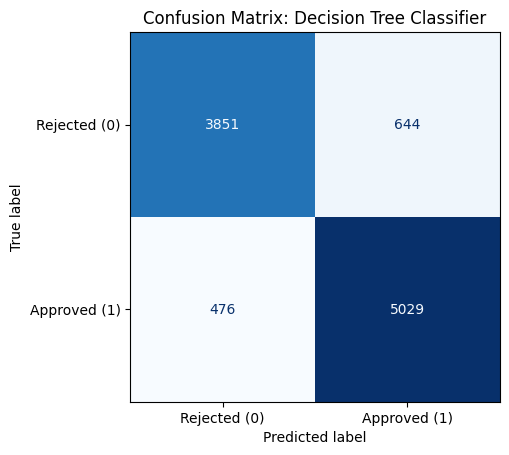

In [ ]:
display_confusion_matrix(y_val, best_dt_model.predict(X_val), "Decision Tree Classifier")

# KNN

Hyperparameter Tuning K-Nearest Neighbors (KNN) dengan GridSearchCV

KNN adalah model klasifikasi yang bekerja dengan prinsip “data baru mengikuti mayoritas tetangga terdekatnya”. Artinya, ketika ada 1 data validasi baru, KNN akan mencari beberapa data training yang paling mirip (paling dekat jaraknya), lalu menentukan kelas berdasarkan mayoritas tetangga tersebut.

Karena KNN bergantung pada jarak, penggunaan data yang sudah diskalakan (X_train_scaled, X_val_scaled) sangat penting agar fitur yang skalanya besar tidak mendominasi perhitungan jarak.

Pada tuning ini, GridSearchCV digunakan untuk mencari kombinasi parameter terbaik berdasarkan accuracy pada cross-validation (cv=5).

Parameter yang dituning pada kode ini:

n_neighbors (K): jumlah tetangga yang dijadikan acuan keputusan.

K kecil (misal 3) → keputusan lebih sensitif (bisa menangkap pola detail, tapi rawan noise/overfitting)

K besar (misal 21) → keputusan lebih stabil (lebih smooth, tapi bisa underfitting)

weights: cara memberi pengaruh pada tetangga.

uniform → semua tetangga dianggap sama penting (voting biasa)

distance → tetangga yang lebih dekat diberi bobot lebih besar (sering membantu jika tetangga dekat lebih relevan)

metric: cara menghitung jarak antar data.

euclidean → jarak lurus (paling umum)

manhattan → jarak “kotak-kotak” (jumlah selisih tiap fitur), kadang lebih cocok untuk data tertentu

Setelah proses GridSearch selesai:

best_params_ berisi kombinasi parameter KNN terbaik dari CV.

best_estimator_ adalah model KNN terbaik yang kemudian dipakai untuk prediksi pada validation set.

Hasil dievaluasi menggunakan akurasi, precision, recall, dan classification report.

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(X_train_scaled, y_train)

best_params = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

y_pred_knn = best_knn_model.predict(X_val_scaled)

print("-" * 30)
print("HASIL EVALUASI KNN (GRID SEARCH)")
print("-" * 30)
print(f'Akurasi KNN   : {accuracy_score(y_val, y_pred_knn):.4f}')
print(f'Precision KNN : {precision_score(y_val, y_pred_knn):.4f}')
print(f'Recall KNN    : {recall_score(y_val, y_pred_knn):.4f}')
print("-" * 30)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_knn))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
------------------------------
HASIL EVALUASI KNN (GRID SEARCH)
------------------------------
Akurasi KNN   : 0.8602
Precision KNN : 0.8297
Recall KNN    : 0.9388
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      4495
           1       0.83      0.94      0.88      5505

    accuracy                           0.86     10000
   macro avg       0.87      0.85      0.86     10000
weighted avg       0.87      0.86      0.86     10000



1) Tuning p + metric='minkowski' (lebih fleksibel dari euclidean/manhattan)

Di sklearn, Minkowski itu “payung” jarak:

p=1 → sama seperti Manhattan

p=2 → sama seperti Euclidean

p=3/4 → variasi lain yang kadang lebih cocok untuk pola data tertentu

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_knn2 = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21, 31, 41],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2, 3, 4]
}

grid_search_knn2 = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_knn2.fit(X_train_scaled, y_train)

best_params_knn2 = grid_search_knn2.best_params_
best_knn_model2 = grid_search_knn2.best_estimator_

y_pred_knn2 = best_knn_model2.predict(X_val_scaled)

print("-" * 35)
print("HASIL EVALUASI KNN (MINKOWSKI + p TUNING)")
print("-" * 35)
print(f'Akurasi KNN   : {accuracy_score(y_val, y_pred_knn2):.4f}')
print(f'Precision KNN : {precision_score(y_val, y_pred_knn2):.4f}')
print(f'Recall KNN    : {recall_score(y_val, y_pred_knn2):.4f}')
print("-" * 35)

print("\nBest Params KNN:", best_params_knn2)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_knn2))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


2) Tuning leaf_size (pengaruh ke kecepatan dan kadang performa)

leaf_size memengaruhi struktur pencarian tetangga (BallTree/KDTree).
Biasanya ini lebih berpengaruh ke kecepatan, tapi pada beberapa data bisa sedikit memengaruhi hasil.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_knn3 = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21, 31],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30, 40, 60, 80]
}

grid_search_knn3 = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn3,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_knn3.fit(X_train_scaled, y_train)

best_params_knn3 = grid_search_knn3.best_params_
best_knn_model3 = grid_search_knn3.best_estimator_

y_pred_knn3 = best_knn_model3.predict(X_val_scaled)

print("-" * 35)
print("HASIL EVALUASI KNN (LEAF_SIZE TUNING)")
print("-" * 35)
print(f'Akurasi KNN   : {accuracy_score(y_val, y_pred_knn3):.4f}')
print(f'Precision KNN : {precision_score(y_val, y_pred_knn3):.4f}')
print(f'Recall KNN    : {recall_score(y_val, y_pred_knn3):.4f}')
print("-" * 35)

print("\nBest Params KNN:", best_params_knn3)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_knn3))


3) Tuning algorithm (cara mencari tetangga terdekat)

KNN punya pilihan algoritma pencarian tetangga:

auto (default, pilih otomatis)

ball_tree

kd_tree

brute (cek semua)

Umumnya ini memengaruhi kecepatan, tapi kadang bisa beda performa karena perbedaan pendekatan pencarian (terutama di data berdimensi tinggi).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_knn4 = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21, 31],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn4 = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn4,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_knn4.fit(X_train_scaled, y_train)

best_params_knn4 = grid_search_knn4.best_params_
best_knn_model4 = grid_search_knn4.best_estimator_

y_pred_knn4 = best_knn_model4.predict(X_val_scaled)

print("-" * 35)
print("HASIL EVALUASI KNN (ALGORITHM TUNING)")
print("-" * 35)
print(f'Akurasi KNN   : {accuracy_score(y_val, y_pred_knn4):.4f}')
print(f'Precision KNN : {precision_score(y_val, y_pred_knn4):.4f}')
print(f'Recall KNN    : {recall_score(y_val, y_pred_knn4):.4f}')
print("-" * 35)

print("\nBest Params KNN:", best_params_knn4)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_knn4))


4) Tuning tujuan: ganti scoring jadi f1 / recall (kalau kelas tidak seimbang)

Kalau kelas 1 (misal gagal bayar) minoritas, mengejar akurasi saja kadang kurang tepat.
Tuning ini mengarahkan GridSearch memilih model yang lebih bagus untuk menangkap kelas 1.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_knn5 = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21, 31, 41],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2]
}

grid_search_knn5 = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn5,
    cv=5,
    scoring='f1',   # bisa ganti 'recall'
    n_jobs=-1,
    verbose=1
)

grid_search_knn5.fit(X_train_scaled, y_train)

best_params_knn5 = grid_search_knn5.best_params_
best_knn_model5 = grid_search_knn5.best_estimator_

y_pred_knn5 = best_knn_model5.predict(X_val_scaled)

print("-" * 35)
print("HASIL EVALUASI KNN (GRID SEARCH - SCORING F1)")
print("-" * 35)
print(f'Akurasi KNN   : {accuracy_score(y_val, y_pred_knn5):.4f}')
print(f'Precision KNN : {precision_score(y_val, y_pred_knn5):.4f}')
print(f'Recall KNN    : {recall_score(y_val, y_pred_knn5):.4f}')
print("-" * 35)

print("\nBest Params KNN:", best_params_knn5)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_knn5))


In [ ]:
display_confusion_matrix(y_val, y_pred_knn, "KNN Classifier")

# Naive Bayes

Hyperparameter Tuning Naive Bayes (GaussianNB) dengan GridSearchCV

Naive Bayes adalah model klasifikasi yang bekerja dengan konsep probabilitas. Model ini menghitung peluang sebuah data termasuk ke kelas tertentu (0 atau 1) berdasarkan nilai fitur-fiturnya.

Pada kasus klasifikasi biner (misalnya 0 = tidak gagal bayar, 1 = gagal bayar), Gaussian Naive Bayes akan menghitung:

P(kelas = 0 | fitur) dan P(kelas = 1 | fitur)
lalu memilih kelas dengan probabilitas yang lebih besar.

Disebut “naive” karena model mengasumsikan tiap fitur independen satu sama lain (misalnya pendapatan dianggap tidak berhubungan dengan hutang), walaupun di dunia nyata sering tidak benar. Meskipun begitu, Naive Bayes sering tetap bekerja cukup baik dan cepat.

Kenapa yang dituning hanya var_smoothing?

Untuk GaussianNB, parameter yang paling umum dituning adalah var_smoothing.

Apa fungsi var_smoothing?

GaussianNB menganggap setiap fitur mengikuti distribusi normal (Gaussian) per kelas. Saat menghitung probabilitas, model butuh variansi (variance) fitur pada kelas tersebut.

Masalahnya: kadang variansi bisa sangat kecil (mendekati 0), sehingga perhitungan probabilitas jadi tidak stabil (terjadi pembagian dengan nilai yang sangat kecil).
var_smoothing menambahkan nilai kecil ke variansi agar:

perhitungan lebih stabil,

model tidak terlalu sensitif terhadap fitur yang variansinya sangat kecil,

performa bisa lebih baik.

Itulah kenapa kamu pakai range:

np.logspace(-12, -6, 7)


yang artinya mencoba nilai dari
10
−
12
10
−12
 sampai
10
−
6
10
−6
.

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(-12, -6, 7)
}

grid_search_nb = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_nb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_nb.fit(X_train, y_train)

best_params_nb = grid_search_nb.best_params_
best_nb_model = grid_search_nb.best_estimator_

y_pred_nb = best_nb_model.predict(X_val)
print("-" * 35)
print("HASIL EVALUASI NAIVE BAYES (GRID SEARCH)")
print("-" * 35)
print(f'Akurasi NB   : {accuracy_score(y_val, y_pred_nb):.4f}')
print(f'Precision NB : {precision_score(y_val, y_pred_nb):.4f}')
print(f'Recall NB    : {recall_score(y_val, y_pred_nb):.4f}')
print("-" * 35)

print("\nBest Params NB:", best_params_nb)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_nb))

1) Perluas rentang var_smoothing (lebih halus)

Kalau range sekarang terlalu sempit, coba perluas dan lebih rapat.

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_nb2 = {
    'var_smoothing': np.logspace(-15, -3, 25)
}

grid_search_nb2 = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_nb2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_nb2.fit(X_train, y_train)

best_params_nb2 = grid_search_nb2.best_params_
best_nb_model2 = grid_search_nb2.best_estimator_

y_pred_nb2 = best_nb_model2.predict(X_val)

print("-" * 40)
print("HASIL EVALUASI GAUSSIAN NB (WIDER VAR_SMOOTHING)")
print("-" * 40)
print(f'Akurasi NB   : {accuracy_score(y_val, y_pred_nb2):.4f}')
print(f'Precision NB : {precision_score(y_val, y_pred_nb2):.4f}')
print(f'Recall NB    : {recall_score(y_val, y_pred_nb2):.4f}')
print("-" * 40)

print("\nBest Params NB:", best_params_nb2)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_nb2))


2) Ganti target tuning: scoring='f1' atau scoring='recall'

Kalau kelas 1 itu minoritas (contoh: “gagal bayar” sedikit), optimasi accuracy kadang kurang tepat. Bisa tuning yang lebih fokus ke menangkap kelas 1.

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_nb3 = {
    'var_smoothing': np.logspace(-12, -6, 7)
}

grid_search_nb3 = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_nb3,
    cv=5,
    scoring='f1',   # bisa ganti 'recall'
    n_jobs=-1,
    verbose=1
)

grid_search_nb3.fit(X_train, y_train)

best_params_nb3 = grid_search_nb3.best_params_
best_nb_model3 = grid_search_nb3.best_estimator_

y_pred_nb3 = best_nb_model3.predict(X_val)

print("-" * 40)
print("HASIL EVALUASI GAUSSIAN NB (GRID SEARCH - SCORING F1)")
print("-" * 40)
print(f'Akurasi NB   : {accuracy_score(y_val, y_pred_nb3):.4f}')
print(f'Precision NB : {precision_score(y_val, y_pred_nb3):.4f}')
print(f'Recall NB    : {recall_score(y_val, y_pred_nb3):.4f}')
print("-" * 40)

print("\nBest Params NB:", best_params_nb3)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_nb3))


3) Coba “tipe Naive Bayes” lain (kalau datanya cocok)

Ini sering lebih berdampak daripada sekadar var_smoothing.

a) MultinomialNB (bagus untuk fitur non-negatif / count / frekuensi)

Kalau fitur kamu berupa count, frekuensi, atau setelah transform jadi non-negatif.

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_mnb = {
    'alpha': np.logspace(-4, 1, 12)   # smoothing Laplace
}

grid_search_mnb = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=param_grid_mnb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_mnb.fit(X_train_nonneg, y_train)  # catatan: X harus non-negatif

best_params_mnb = grid_search_mnb.best_params_
best_mnb_model = grid_search_mnb.best_estimator_

y_pred_mnb = best_mnb_model.predict(X_val_nonneg)

print("-" * 40)
print("HASIL EVALUASI MULTINOMIAL NB (GRID SEARCH)")
print("-" * 40)
print(f'Akurasi NB   : {accuracy_score(y_val, y_pred_mnb):.4f}')
print(f'Precision NB : {precision_score(y_val, y_pred_mnb):.4f}')
print(f'Recall NB    : {recall_score(y_val, y_pred_mnb):.4f}')
print("-" * 40)

print("\nBest Params NB:", best_params_mnb)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_mnb))


b) ComplementNB (sering lebih bagus untuk data imbalanced pada fitur count/teks)

Mirip MultinomialNB tapi sering lebih stabil.

In [ ]:
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

param_grid_cnb = {
    'alpha': np.logspace(-4, 1, 12)
}

grid_search_cnb = GridSearchCV(
    estimator=ComplementNB(),
    param_grid=param_grid_cnb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_cnb.fit(X_train_nonneg, y_train)

best_params_cnb = grid_search_cnb.best_params_
best_cnb_model = grid_search_cnb.best_estimator_

y_pred_cnb = best_cnb_model.predict(X_val_nonneg)

print("-" * 40)
print("HASIL EVALUASI COMPLEMENT NB (GRID SEARCH)")
print("-" * 40)
print(f'Akurasi NB   : {accuracy_score(y_val, y_pred_cnb):.4f}')
print(f'Precision NB : {precision_score(y_val, y_pred_cnb):.4f}')
print(f'Recall NB    : {recall_score(y_val, y_pred_cnb):.4f}')
print("-" * 40)

print("\nBest Params NB:", best_params_cnb)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_cnb))


In [ ]:
display_confusion_matrix(y_val, y_pred_nb, "Naive Bayes Classifier")

# Algoritma Genetika

In [ ]:
neighbors_space = [3, 5, 7, 9, 11, 15, 21]
weights_space = ['uniform', 'distance']
metric_space = ['euclidean', 'manhattan']

def make_individual():
    return {
        "n_neighbors": random.choice(neighbors_space),
        "weights": random.choice(weights_space),
        "metric": random.choice(metric_space)
    }

def fitness(ind):
    model = KNeighborsClassifier(
        n_neighbors=ind["n_neighbors"],
        weights=ind["weights"],
        metric=ind["metric"]
    )
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_val_scaled)
    return accuracy_score(y_val, pred)

def crossover(p1, p2):
    child = {}
    for key in p1.keys():
        child[key] = p1[key] if random.random() < 0.5 else p2[key]
    return child

def mutate(ind, mut_rate=0.2):
    if random.random() < mut_rate:
        ind["n_neighbors"] = random.choice(neighbors_space)
    if random.random() < mut_rate:
        ind["weights"] = random.choice(weights_space)
    if random.random() < mut_rate:
        ind["metric"] = random.choice(metric_space)
    return ind

# parameter GA
pop_size = 20
generations = 10
elite_size = 4
mut_rate = 0.2

# init populasi
population = [make_individual() for _ in range(pop_size)]

for gen in range(generations):
    scored = [(fitness(ind), ind) for ind in population]
    scored.sort(reverse=True, key=lambda x: x[0])

    best_score, best_ind = scored[0]
    print(f"Gen {gen+1}/{generations} | Best Acc: {best_score:.4f} | Params: {best_ind}")

    # elitism
    new_pop = [ind for _, ind in scored[:elite_size]]

    # generate offspring
    while len(new_pop) < pop_size:
        parent1 = random.choice(scored[:10])[1]
        parent2 = random.choice(scored[:10])[1]
        child = crossover(parent1, parent2)
        child = mutate(child, mut_rate=mut_rate)
        new_pop.append(child)

    population = new_pop

# hasil terbaik final
final_scored = [(fitness(ind), ind) for ind in population]
final_scored.sort(reverse=True, key=lambda x: x[0])
best_acc_ga, best_params_ga = final_scored[0]

Gen 1/10 | Best Acc: 0.8600 | Params: {'n_neighbors': 11, 'weights': 'uniform', 'metric': 'euclidean'}
Gen 2/10 | Best Acc: 0.8606 | Params: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'euclidean'}
Gen 3/10 | Best Acc: 0.8606 | Params: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'euclidean'}
Gen 4/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 5/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 6/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 7/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 8/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 9/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Gen 10/10 | Best Acc: 0.8609 | Params: {'n_neighbors': 15, 'weigh

In [ ]:
print("\n" + "-" * 40)
print("HASIL OPTIMASI GA")
print("-" * 40)
print("Best Params GA:", best_params_ga)
print(f"Best Val Accuracy: {best_acc_ga:.4f}")
print("-" * 40)

# train model terbaik dari GA dan evaluasi (seperti model lain)
best_knn_ga = KNeighborsClassifier(**best_params_ga)
best_knn_ga.fit(X_train_scaled, y_train)
y_pred_ga = best_knn_ga.predict(X_val_scaled)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_ga))


----------------------------------------
HASIL OPTIMASI GA
----------------------------------------
Best Params GA: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}
Best Val Accuracy: 0.8609
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      4495
           1       0.83      0.94      0.88      5505

    accuracy                           0.86     10000
   macro avg       0.87      0.85      0.86     10000
weighted avg       0.87      0.86      0.86     10000



<Figure size 600x500 with 0 Axes>

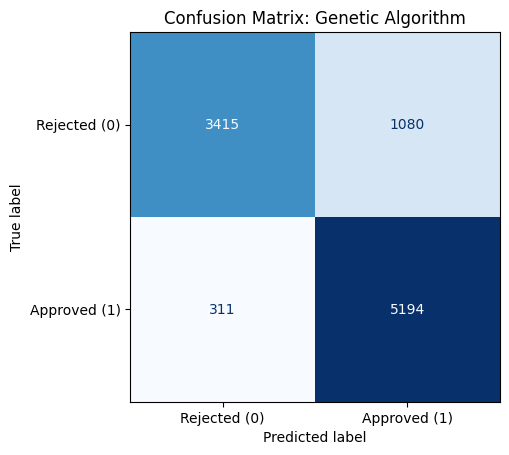

In [ ]:
display_confusion_matrix(y_val, y_pred_ga, "Genetic Algorithm")

## Evaluasi di data test

# Linear Regression

In [ ]:
test_preds_lin = (linreg_model.predict(X_test_scaled) >= 0.5).astype(int)

print(f'Akurasi Linear Regression : {accuracy_score(y_test, test_preds_lin):.4f}')
print(f'Precision Linear Regression : {precision_score(y_test, test_preds_lin):.4f}')
print(f'Recall Linear Regression : {recall_score(y_test, test_preds_lin):.4f}')


Akurasi Linear Regression : 0.8506
Precision Linear Regression : 0.8430
Recall Linear Regression : 0.8953


<Figure size 600x500 with 0 Axes>

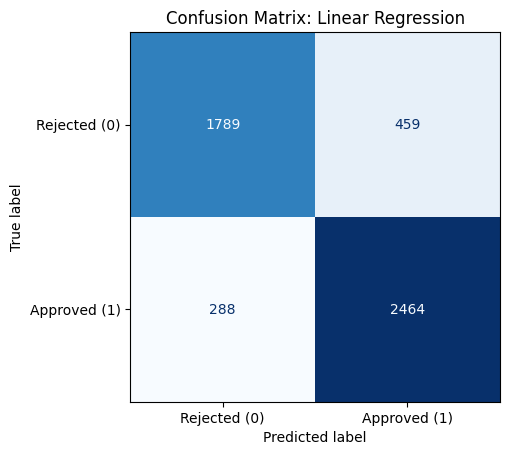

In [ ]:
display_confusion_matrix(y_test, test_preds_lin, "Linear Regression")


# Logistic Regression

In [ ]:
test_preds_logreg = best_logreg_model.predict(X_test_scaled)

print(f'Akurasi Logistic Regression : {accuracy_score(y_test, test_preds_logreg):.4f}')
print(f'Precision Logistic Regression : {precision_score(y_test, test_preds_logreg):.4f}')
print(f'Recall Logistic Regression : {recall_score(y_test, test_preds_logreg):.4f}')

Akurasi Logistic Regression : 0.8550
Precision Logistic Regression : 0.8590
Recall Logistic Regression : 0.8812


<Figure size 600x500 with 0 Axes>

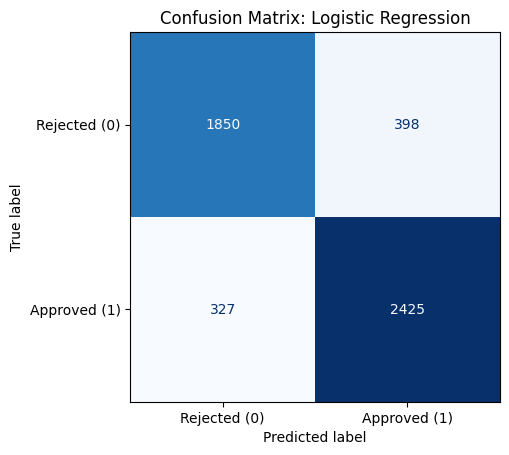

In [ ]:
display_confusion_matrix(y_test, best_logreg_model.predict(X_test_scaled), "Logistic Regression")


# Decision Tree

In [ ]:
test_preds_dt = best_dt_model.predict(X_test)

print(f'Akurasi DT : {accuracy_score(y_test, test_preds_dt):.4f}')
print(f'Precision DT : {precision_score(y_test, test_preds_dt):.4f}')
print(f'Recall DT : {recall_score(y_test, test_preds_dt):.4f}')

Akurasi DT : 0.8842
Precision DT : 0.8827
Recall DT : 0.9106


<Figure size 600x500 with 0 Axes>

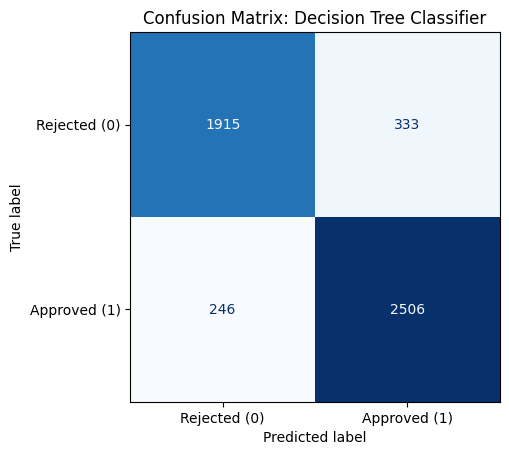

In [ ]:
display_confusion_matrix(y_test, best_dt_model.predict(X_test), "Decision Tree Classifier")

# KNN

In [ ]:
test_preds_knn = best_knn_model.predict(X_test)

print(f'Akurasi KNN   : {accuracy_score(y_test, test_preds_knn):.4f}')
print(f'Precision KNN : {precision_score(y_test, test_preds_knn):.4f}')
print(f'Recall KNN    : {recall_score(y_test, test_preds_knn):.4f}')

Akurasi KNN   : 0.6028
Precision KNN : 0.5808
Recall KNN    : 1.0000


<Figure size 600x500 with 0 Axes>

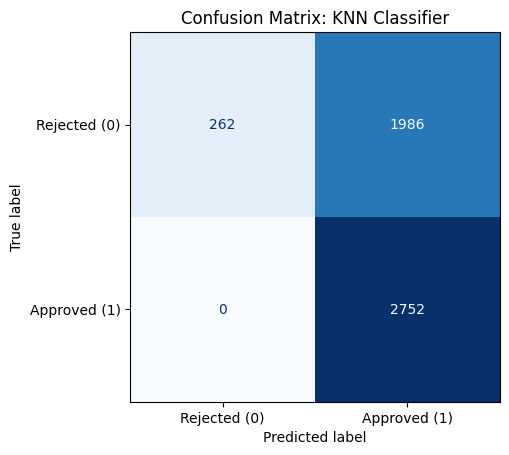

In [ ]:
display_confusion_matrix(y_test, best_knn_model.predict(X_test), "KNN Classifier")

# Naive Bayes

In [ ]:
test_preds_nb = best_nb_model.predict(X_test)

print(f'Akurasi Naive Bayes: {accuracy_score(y_test, test_preds_nb):.4f}')
print(f'Precision Naive Bayes: {precision_score(y_test, test_preds_nb):.4f}')
print(f'Recall Naive Bayes: {recall_score(y_test, test_preds_nb):.4f}')

Akurasi Naive Bayes: 0.7708
Precision Naive Bayes: 0.7280
Recall Naive Bayes: 0.9317


<Figure size 600x500 with 0 Axes>

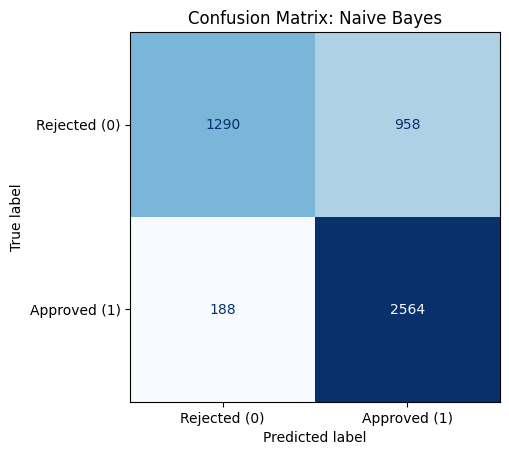

In [ ]:
display_confusion_matrix(y_test, best_nb_model.predict(X_test), "Naive Bayes")

# Algoritma Genetika

In [ ]:
test_preds_ga = best_knn_ga.predict(X_test_scaled)

print(f'Akurasi GA : {accuracy_score(y_test, test_preds_ga):.4f}')
print(f'Precision GA : {precision_score(y_test, test_preds_ga):.4f}')
print(f'Recall GA : {recall_score(y_test, test_preds_ga):.4f}')

Akurasi GA : 0.8566
Precision GA : 0.8248
Recall GA : 0.9390


<Figure size 600x500 with 0 Axes>

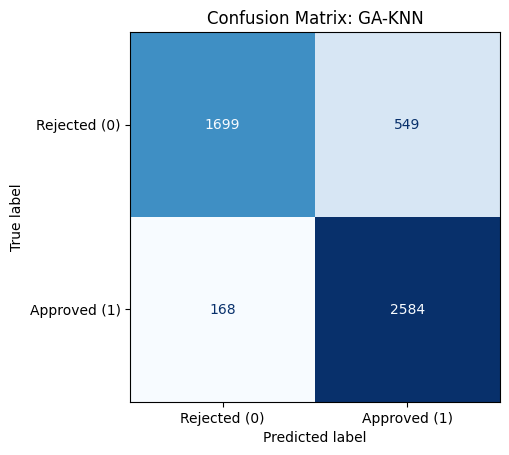

In [ ]:
display_confusion_matrix(y_test, best_knn_ga.predict(X_test_scaled), "GA-KNN")


## Kesimpulan

1. **RINGKASAN DATA & PREPROCESSING**

   * Dataset yang digunakan adalah *Loan_approval_data_2025.csv* (Kaggle “realistic-loan-approval-dataset-us-and-canada”), dan kolom `customer_id` dihapus karena tidak informatif.  
   * Kualitas data: **tidak ada duplikasi** dan **tidak ada missing value**.
   * Target `loan_status` cukup **balanced** (kelas 1 = 27.523, kelas 0 = 22.477), jadi tidak dilakukan resampling (mis. SMOTE).
   * Encoding kategori dilakukan dengan **LabelEncoder** untuk `occupation_status`, `product_type`, `loan_intent`.
   * Transformasi **log (np.log1p)** diterapkan pada fitur yang skewed seperti `annual_income`, `savings_assets`, `years_employed`, `current_debt`, `loan_amount`, dan beberapa rasio agar lebih mendekati normal.
   * Pembagian data: **70% train**, **20% validation**, **10% test**, memakai `stratify` agar komposisi kelas tetap seimbang.
   * Scaling **MinMaxScaler** dipakai untuk model yang sensitif skala (Linear/Logistic/KNN/GA).

2. **EVALUASI MODEL (DATA TEST)**
   Model yang diuji: Linear Regression (threshold 0.5), Logistic Regression (GridSearch), Decision Tree (GridSearch), KNN (GridSearch), Naive Bayes (GridSearch), dan Algoritma Genetika (optimasi KNN).

   A. **Linear Regression (>= 0.5)**

   * Akurasi: **0.8506** | Precision: **0.8430** | Recall: **0.8953**

   B. **Logistic Regression (Grid Search)**

   * Akurasi: **0.8550** | Precision: **0.8590** | Recall: **0.8812**

   C. **Decision Tree (MODEL TERBAIK)**

   * Akurasi: **0.8842** | Precision: **0.8827** | Recall: **0.9106**
   * Catatan: performanya paling “seimbang” dan metrik tertinggi di data test dibanding model lain yang kamu jalankan.

   D. **KNN (Grid Search)**

   * Akurasi: **0.6028** | Precision: **0.5808** | Recall: **1.0000**
   * Catatan penting: di bagian test, prediksi KNN dilakukan ke `X_test` (bukan `X_test_scaled`)  sehingga hasilnya bisa tidak merepresentasikan performa KNN yang sebenarnya (karena KNN sangat sensitif skala fitur).

   E. **Naive Bayes (Grid Search)**

   * Akurasi: **0.7708** | Precision: **0.7280** | Recall: **0.9317**

   F. **Algoritma Genetika (GA-KNN)**

   * Akurasi: **0.8570** | Precision: **0.8299** | Recall: **0.9310**

3. **ANALISIS CONFUSION MATRIX (DECISION TREE – DATA TEST)**
   Dari confusion matrix *Decision Tree Classifier* di data test:  

   * **True Negative (Rejected → Rejected)** = **1.915**
   * **False Positive (Rejected → Approved)** = **333**
   * **False Negative (Approved → Rejected)** = **246**
   * **True Positive (Approved → Approved)** = **2.506**
     Interpretasi singkat: jumlah salah prediksi “Approved padahal seharusnya Rejected” (FP=333) dan “Rejected padahal seharusnya Approved” (FN=246) relatif kecil dibanding prediksi benar, sehingga akurasi dan recall-nya tinggi.

4. **REKOMENDASI**
   Berdasarkan evaluasi test yang kamu jalankan, model **Decision Tree** paling layak dijadikan kandidat utama karena metriknya paling tinggi dan stabil (akurasi 0.8842 dan recall 0.9106).
   Untuk konteks bisnis pinjaman: kalau fokus kamu adalah “mengurangi risiko salah approve”, kamu bisa lanjutkan dengan:

   * Mengubah `scoring` saat tuning (mis. fokus ke precision kelas Approved atau cost-sensitive), dan/atau
   * Mengatur threshold/aturan keputusan (khususnya untuk model probabilistik), supaya FP bisa ditekan sesuai kebijakan risiko bank.
